In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
fertility = pd.read_excel("fertility_rate.xlsx")

In [3]:
fertility.head()

,regions,2011,2012,2013,2015,2017,2019,2021
0,Autonomous Republic of Crimea,1.56,1.68,1.66,_,_,_,_
1,Vinnytsia region,1.53,1.59,1.53,1.5,1.36,1.2,1.14
2,Volyn region,1.81,1.92,1.86,1.74,1.62,1.48,1.45
3,Dnipropetrovsk region,1.44,1.52,1.51,1.48,1.29,1.11,1.03
4,Donetsk region,1.27,1.34,1.32,_,_,_,_


In [4]:
fertility.shape

(27, 8)

In [5]:
fertility.replace('_', np.nan, inplace=True)

C:\Users\skokr\AppData\Local\Temp\ipykernel_868\364717636.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fertility.replace('_', np.nan, inplace=True)


In [6]:
fertility.dtypes

regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019        object
2021        object
dtype: object

In [7]:
fertility[[2019, 2021]] = fertility[[2019, 2021]].apply(pd.to_numeric, errors='coerce')

In [8]:
fertility.dtypes

regions     object
2011       float64
2012       float64
2013       float64
2015       float64
2017       float64
2019       float64
2021       float64
dtype: object

In [9]:
null_proportion = fertility.isnull().sum() / len(fertility)
print(f"Blank spaces proportion:\n{null_proportion}")

Blank spaces proportion:
regions    0.000000
2011       0.037037
2012       0.000000
2013       0.000000
2015       0.148148
2017       0.148148
2019       0.148148
2021       0.407407
dtype: float64


There is no data for the whole country in this DataFrame, so the task "Usuń z tabeli dane dla całego kraju, ostatni wiersz tabeli" cannot be completed

In [10]:
numeric_columns = fertility.select_dtypes(include='number').columns
column_averages = fertility[numeric_columns].mean()

fertility[numeric_columns] = fertility[numeric_columns].fillna(column_averages)

In [11]:
year_2019_average = fertility[2019].mean()
regions_higher_than_average = [region for region in fertility[fertility[2019] > year_2019_average]['regions']]
print(regions_higher_than_average)

['Volyn region', 'Transcarpathian region', 'Ivano-Frankivsk region', 'Kyiv region', 'Lviv region', 'Odessa region', 'Rivne region', 'Kherson region', 'Khmelnytsky region', 'Chernivtsi region', 'city of Kyiv']


"Który region miał najwyższy wskaźnik urodzeń w 2014 roku?" changed to "Który region miał najwyższy wskaźnik urodzeń w 2015 roku?", because DataFrame doesn't have data for 2014 year.

In [12]:
max_birth_rate_row = fertility[2015].idxmax()

region_highest_birth_rate_2015 = fertility.loc[max_birth_rate_row, 'regions']

print("Region with the highest birth rate in 2015:", region_highest_birth_rate_2015)

Region with the highest birth rate in 2015: Rivne region


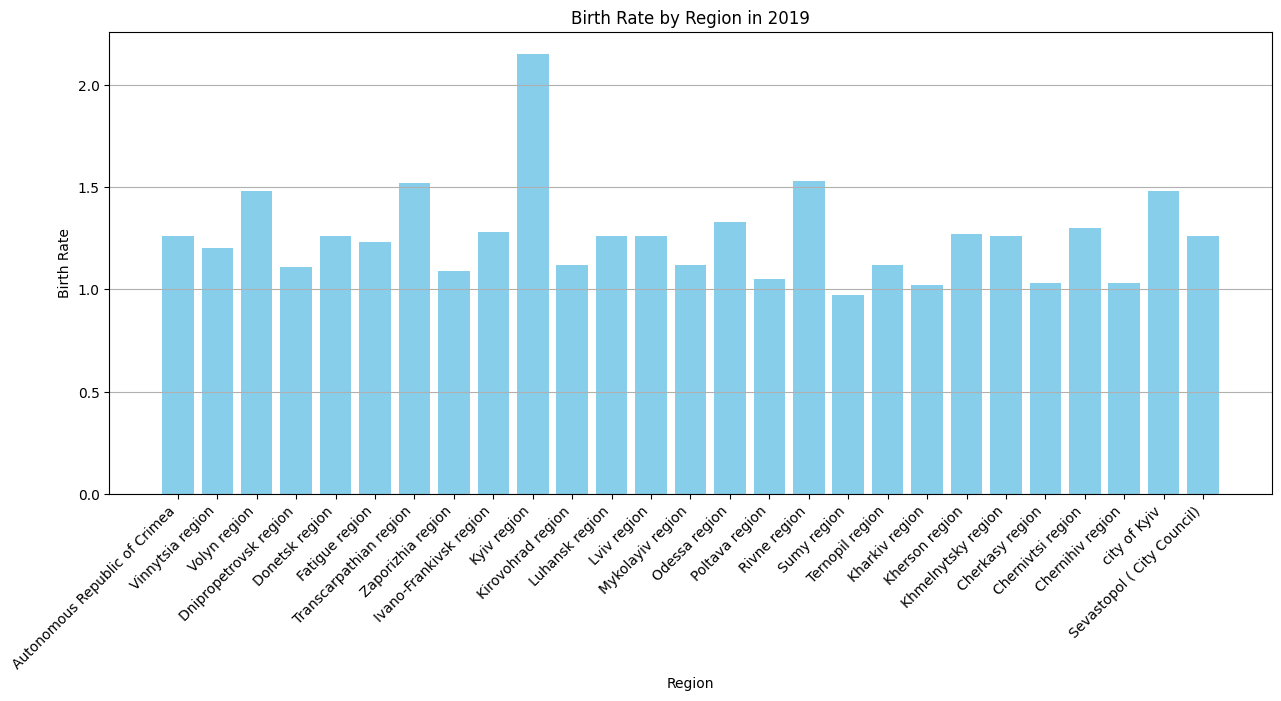

In [13]:
plt.figure(figsize=(15, 6))
plt.bar(fertility['regions'], fertility[2019], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.title('Birth Rate by Region in 2019')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

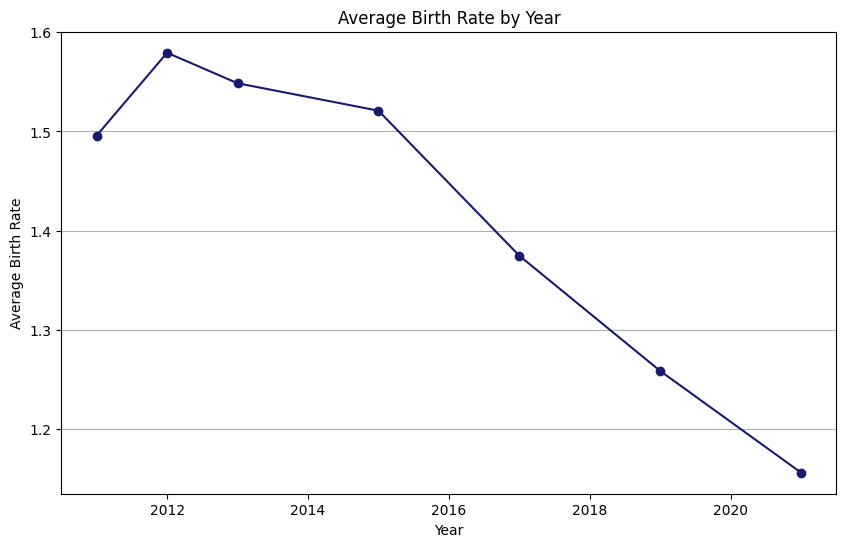

In [14]:
numeric_columns = fertility.drop(columns=['regions'])
averages = numeric_columns.mean()

plt.figure(figsize=(10, 6))
plt.plot(averages.index, averages.values, marker='o', color='midnightblue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Birth Rate')
plt.title('Average Birth Rate by Year')
plt.grid(axis='y')

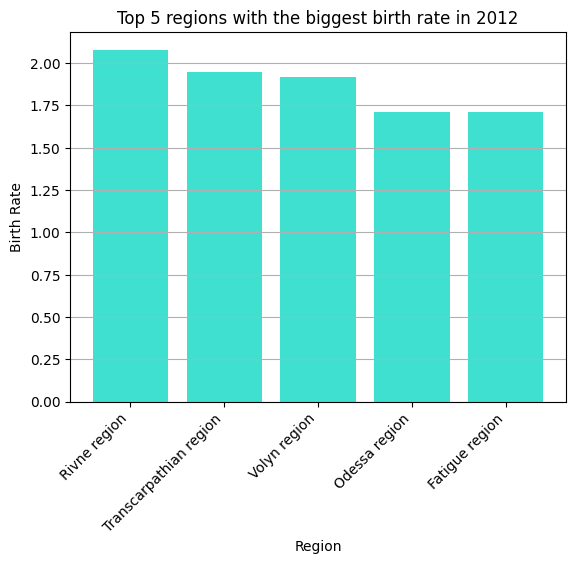

In [15]:
data = fertility.sort_values(by=[2012], ascending=False).head(n=5)
plt.bar(data['regions'], data[2012], color='turquoise')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.title('Top 5 regions with the biggest birth rate in 2012')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

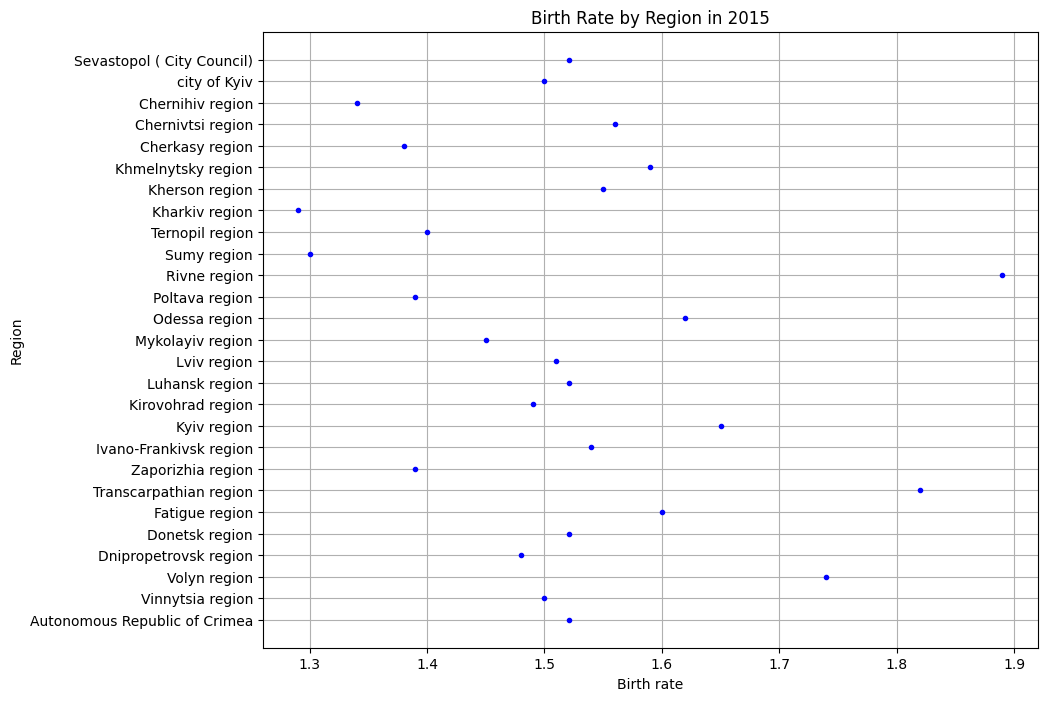

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(fertility[2015], fertility["regions"], 'b.')
plt.xlabel('Birth rate')
plt.ylabel('Region')
plt.title('Birth Rate by Region in 2015')
plt.grid(visible=True)